In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from loader import *

%load_ext autoreload
%autoreload 2

/home/zachhendon/miniconda3/envs/text-detection/lib/python3.12/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [2]:
batch_size = 16
# train_loader, val_loader = get_icdar2015_loaders("data/processed", batch_size=batch_size)
train_loader, val_loader = get_synthtext_loaders("data/processed", batch_size=batch_size)

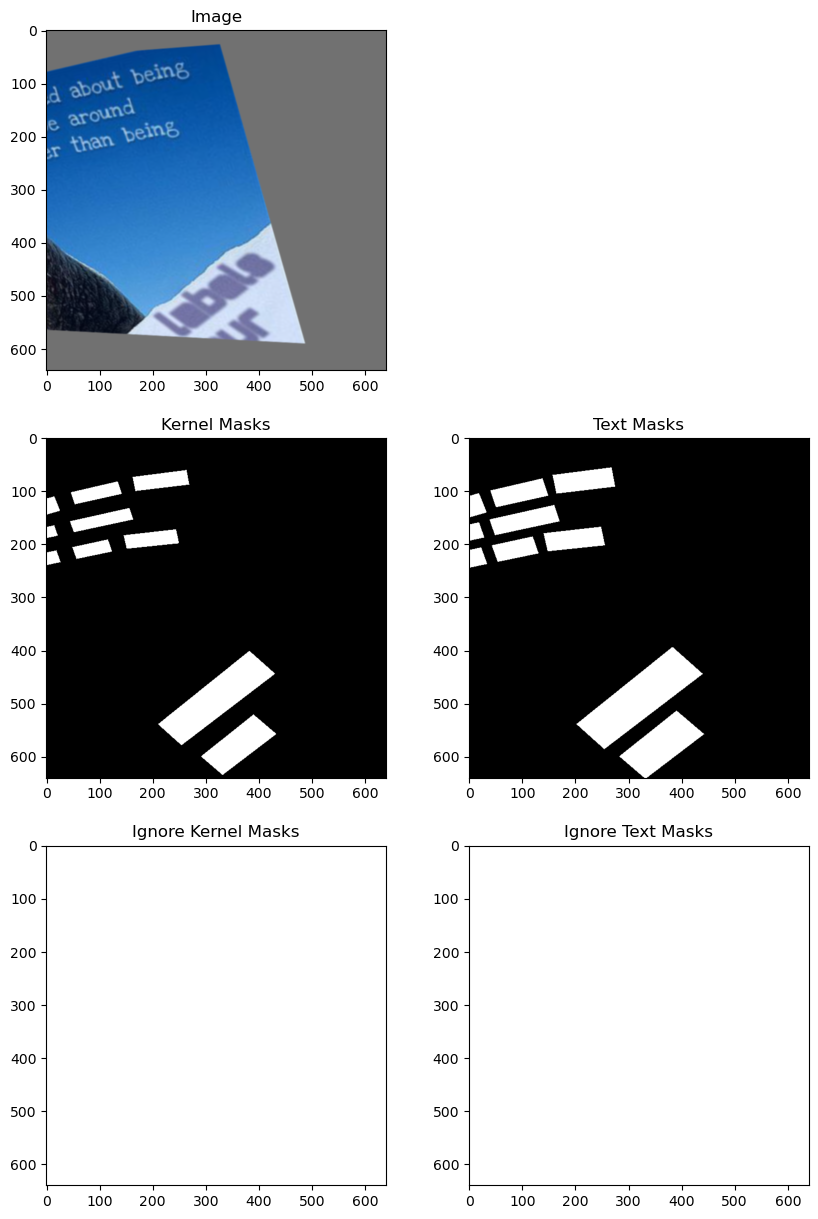

In [3]:
data = next(train_loader)
# data = next(val_loader)
image = data[0][0]
kernel_masks = data[1][0]
ignore_kernel_masks = data[2][0]
text_masks = data[3][0]
ignore_text_masks = data[4][0]

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.delaxes(axs[0][1])

# Display the image
image = (image - image.min()) / (image.max() - image.min())
axs[0][0].imshow(image.permute(1, 2, 0).cpu().numpy())
axs[0][0].set_title('Image')

# Display the kernel masks
axs[1][0].imshow(kernel_masks.cpu().numpy(), vmin=0, vmax=1, cmap='gray')
axs[1][0].set_title('Kernel Masks')

# Display the text masks
axs[1][1].imshow(text_masks.cpu().numpy(), vmin=0, vmax=1, cmap='gray')
axs[1][1].set_title('Text Masks')

# Display the ignore kernel masks
axs[2][0].imshow(ignore_kernel_masks.cpu().numpy(), vmin=0, vmax=1, cmap='gray')
axs[2][0].set_title('Ignore Kernel Masks')

# Display the ignore text masks
axs[2][1].imshow(ignore_text_masks.cpu().numpy(), vmin=0, vmax=1, cmap='gray')
axs[2][1].set_title('Ignore Text Masks')

plt.show()

In [4]:
def benchmark(loader, batch_size, num_batches=100):
    s = time.time()
    for _ in tqdm(range(num_batches)):
        _ = next(loader)
    throughput = num_batches * batch_size / (time.time() - s)
    print(f"Throughput: {throughput:.2f} samples/s")

In [5]:
# icdar2015
train_loader, val_loader = get_icdar2015_loaders("data/processed", batch_size=batch_size)

benchmark(train_loader, batch_size)
benchmark(val_loader, batch_size)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:10<00:00,  9.17it/s]


Throughput: 146.67 samples/s


100%|██████████| 100/100 [00:08<00:00, 11.24it/s]

Throughput: 179.84 samples/s


In [6]:
# synthtext
train_loader, val_loader = get_synthtext_loaders("data/processed", batch_size=batch_size)

benchmark(train_loader, batch_size)
benchmark(val_loader, batch_size)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:24<00:00,  4.13it/s]


Throughput: 66.06 samples/s


100%|██████████| 100/100 [00:10<00:00,  9.83it/s]

Throughput: 157.23 samples/s
